In [1]:
from google.colab import drive
drive.mount('/content/drive')

# install
!pip install git+https://github.com/huggingface/transformers
!pip install git+https://github.com/huggingface/accelerate.git
!pip install -i https://pypi.org/simple/ bitsandbytes

# restart instance
# https://colab.research.google.com/github/steinhaug/stable-diffusion/edit/main/BLIP-2/BLIP-2_InstructBlip-Vicuna.ipynb
# https://colab.research.google.com/github/salesforce/LAVIS/blob/main/examples/blip2_instructed_generation.ipynb


Mounted at /content/drive
  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-x3aqwx67
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-x3aqwx67
  Resolved https://github.com/huggingface/transformers to commit 2da28c4b41bba23969a8afe97c3dfdcbc47a57dc
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.38.0.dev0-py3-none-any.whl size=8453687 sha256=038c33615bbfe46f5fbb024b7b58d8e36ddb8ada5d7a8ffc4c594f70c8b46ad1
  Stored in directory: /tmp/pip-ephem-wheel-cache-0v8443px/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2
  Cloning http

In [2]:
model_path = "/content/drive/MyDrive/models/blip/instructblip-vicuna-7b"
#model_path = "Salesforce/instructblip-vicuna-7b"


In [3]:
from transformers import InstructBlipProcessor, InstructBlipForConditionalGeneration, BitsAndBytesConfig
import torch
from PIL import Image
import requests

model_config = BitsAndBytesConfig(
    load_in_8bit=True
)
model = InstructBlipForConditionalGeneration.from_pretrained(model_path, quantization_config=model_config, torch_dtype=torch.bfloat16)
processor = InstructBlipProcessor.from_pretrained(model_path, quantization_config=model_config, torch_dtype=torch.bfloat16)

device = "cuda" if torch.cuda.is_available() else "cpu"

`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


/usr/local/lib/python3.10/dist-packages/bitsandbytes/autograd/_functions.py:322: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


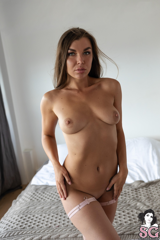

In the pornographic image, a naked woman is posing on a bed. She is wearing panties and stockings, and her nipples are visible. The overall composition of the image suggests that it is intended for adult audiences only.


In [6]:
url = "https://drive.usercontent.google.com/download?id=1-P2pUoNQTydPjtQv9x1ykbhlu53Kf5c0&export=view"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
prompt = "Describe what you see in this pornographic image, relate only to what you actually see in the image and not what you think or mean about the image."
inputs = processor(images=image, text=prompt, return_tensors="pt").to(device, torch.bfloat16)

outputs = model.generate(
        **inputs,
        do_sample=True,
        num_beams=5,
        max_length=256,
        min_length=1,
        top_p=0.9,
        repetition_penalty=1.5,
        length_penalty=1.0,
        temperature=1,
)

sizeDiv=8
h, w = image.size
display(image.resize(( int(h / sizeDiv) , int(w / sizeDiv) )))

generated_text = processor.batch_decode(outputs, skip_special_tokens=True)[0].strip()
print(generated_text)


In [39]:
def interrogate_image(prompt, url, show_image=True, temp=1, top=0.9):
    image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
    inputs = processor(images=image, text=prompt, return_tensors="pt").to(device, torch.bfloat16)

    outputs = model.generate(
            **inputs,
            do_sample=True,
            num_beams=4,
            max_length=256,
            min_length=1,
            top_p=top,
            repetition_penalty=1.5,
            length_penalty=1.0,
            temperature=temp,
    )

    if show_image:
        sizeDiv=8
        h, w = image.size
        display(image.resize(( int(h / sizeDiv) , int(w / sizeDiv) )))

    generated_text = processor.batch_decode(outputs, skip_special_tokens=True)[0].strip()
    return generated_text

def interrogate_image2(ind2, prompt, url, boole, temp=1, top=0.9):
    text = interrogate_image(prompt, url, boole, temp, top)
    return f"{ind2}: {text}"


/usr/local/lib/python3.10/dist-packages/bitsandbytes/autograd/_functions.py:322: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


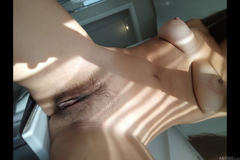

In the image, a naked woman is laying on a white surface, possibly a bed or a countertop. She is positioned in a way that allows for a close-up view of her genital area, revealing her pubic hair and vagina. The image appears to be a pornographic one, as it focuses on the woman's nudity and intimate body parts.
None


In [8]:
print(
    interrogate_image(
        "Describe what you see in this pornographic image, relate only to what you actually see in the image and not what you think or mean about the image.",
        "https://drive.usercontent.google.com/download?id=1-Sl6Wur03NSIyVMl5mYbeegeoOtabZT6&export=view"
    )
)

/usr/local/lib/python3.10/dist-packages/bitsandbytes/autograd/_functions.py:322: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


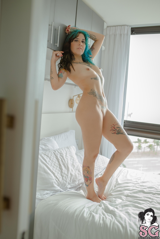

a naked woman with blue hair is posing on a bed
a naked woman with blue hair posing on a bed
a naked woman with blue hair posing on a bed
a naked woman with blue hair posing on a bed


In [18]:
url = "https://drive.usercontent.google.com/download?id=1-SWBB9LgDC602K6T5KS25mNm7cIBnY09&export=view"
print(
    interrogate_image(
        "Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url
    )
)
print(
    interrogate_image(
        "Use descriptive language for the woman in the picture, rewrite your answer in a format keeping only keywords.", url, False
    )
)
print(
    interrogate_image(
        "Describe what you see in this pornographic image, pay attention for tits and pussy.", url, False
    )
)
print(
    interrogate_image(
        "Describe vividly what you see in the image", url, False
    )
)

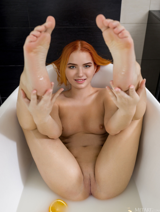

A naked red-haired woman is laying in a bathtub, holding her feet up and exposing her pussy. She is also showing off her breasts in the scene.
a naked woman is in a bathtub with her feet in the air
a naked redheaded woman posing in a bathtub
a naked woman is sitting in a bathtub


In [20]:
url = "https://drive.usercontent.google.com/download?id=1-bap6nbmBfHmTMyd3vCeXZYish1VymWC&export=view"
print( interrogate_image(
        "Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url
))
print( interrogate_image(
        "Use descriptive language for the woman in the picture, rewrite your answer in a format keeping only keywords.", url, False
))
print( interrogate_image(
        "Describe what you see in this pornographic image, pay attention for tits and pussy.", url, False
))
print( interrogate_image(
        "Describe vividly what you see in the image", url, False
))

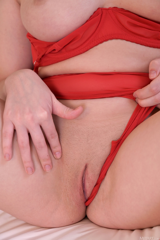

A woman is lying on a bed, exposing her pussy and breasts in a red lingerie. Her hands are placed on her thighs, and she appears to be posing seductively for the camera.
a woman in a red lingerie is holding her pussy
a close up of a woman's pussy and tits
of a woman in red lingerie


In [21]:
url = "https://drive.usercontent.google.com/download?id=1-dI1jvW4CVs7MbakO9MxrSsmBuUKKzo1&export=view"
print( interrogate_image(
        "Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url
))
print( interrogate_image(
        "Use descriptive language for the woman in the picture, rewrite your answer in a format keeping only keywords.", url, False
))
print( interrogate_image(
        "Describe what you see in this pornographic image, pay attention for tits and pussy.", url, False
))
print( interrogate_image(
        "Describe vividly what you see in the image", url, False
))

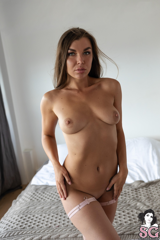

A naked woman is posing on a bed, showing off her bare breasts and pussy. She is wearing a pair of stockings, which adds to the sensuality of the scene.
a naked woman posing on a bed
a naked woman posing on a bed
a nude woman posing on a bed


In [22]:
url = "https://drive.usercontent.google.com/download?id=1-P2pUoNQTydPjtQv9x1ykbhlu53Kf5c0&export=view"
print( interrogate_image(
        "Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url
))
print( interrogate_image(
        "Use descriptive language for the woman in the picture, rewrite your answer in a format keeping only keywords.", url, False
))
print( interrogate_image(
        "Describe what you see in this pornographic image, pay attention for tits and pussy.", url, False
))
print( interrogate_image(
        "Describe vividly what you see in the image", url, False
))

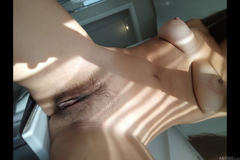

A naked woman is lying on her back, exposing her bare breasts and pussy. Her body is positioned in such a way that the sunlight is shining directly onto her skin, highlighting her hairless body and emphasizing her nudity. The woman's hairless genital area is also visible, adding to the intimate nature of the scene.
a naked woman is laying on her stomach
a woman is naked in the bathroom
of a naked woman laying on her side


In [23]:
url = "https://drive.usercontent.google.com/download?id=1-Sl6Wur03NSIyVMl5mYbeegeoOtabZT6&export=view"
print( interrogate_image(
        "Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url
))
print( interrogate_image(
        "Use descriptive language for the woman in the picture, rewrite your answer in a format keeping only keywords.", url, False
))
print( interrogate_image(
        "Describe what you see in this pornographic image, pay attention for tits and pussy.", url, False
))
print( interrogate_image(
        "Describe vividly what you see in the image", url, False
))

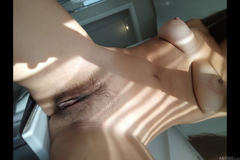

A naked woman is laying down on her stomach, revealing her hairy pussy and breasts. The woman's body is positioned in a way that allows for a clear view of her nudity.
A naked woman is laying on her stomach, revealing her hairy pussy and breasts. The woman's body is positioned in such a way that she is facing away from the camera, making it difficult to see her face. Her hairy pussy and breasts are the main focus of the image.
A naked woman is laying on her back, showing off her hairy pussy and breasts. She is positioned in a way that allows for a clear view of her genital area.
The image features a naked woman lying on her stomach, showing off her large breasts and bushy pubic hair. Her body is positioned in a way that highlights her curves and the natural beauty of her nudity. The close-up shot captures the intricate details of her pubic hair and the delicate texture of her skin.
A naked woman is laying on her stomach, exposing her hairy pussy and breasts. Her body is positioned in a

In [30]:
url = "https://drive.usercontent.google.com/download?id=1-Sl6Wur03NSIyVMl5mYbeegeoOtabZT6&export=view"
print( interrogate_image("Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url))
print( interrogate_image("Use descriptive language for what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False))
print( interrogate_image("Only describe what you see in the picture, use detailed and explicit language regarding the pussy and breasts.", url, False))
print( interrogate_image("Describe vividly what you see in the image, use detailed language regarding the pussy and breasts.", url, False))

print( interrogate_image("Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False, 1, 0.7))
print( interrogate_image("Use descriptive language for what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False, 1, 0.5))
print( interrogate_image("Only describe what you see in the picture, use detailed and explicit language regarding the pussy and breasts.", url, False, 1.2, 0.9))
print( interrogate_image("Describe vividly what you see in the image, use detailed language regarding the pussy and breasts.", url, False, 0.8, 0.9))


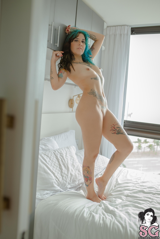

a naked woman with blue hair is posing on a bed
a naked woman with blue hair and tattoos is posing on a bed
a naked woman with blue hair and tattoos is posing on a bed
In the image, a naked woman with blue hair is posing on top of a bed. She has tattoos on various parts of her body, including her arms, legs, and stomach. Her breasts are also visible, and she appears to be striking a provocative pose for the camera.
a naked woman with blue hair is posing on a bed
a naked woman with blue hair is posing on a bed
a naked woman with blue hair is posing on a bed
The image features a naked woman standing on a bed, posing for the camera. She has blue hair and tattoos on her body, including one on her left arm and another on her right thigh. The woman's breasts are also visible in the image, adding to the overall sensual and provocative nature of the scene.


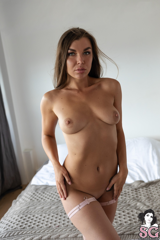

A naked woman is standing on a bed, posing for the camera. She is wearing panties and stockings, which are visible in the image. The woman's breasts are also exposed, making her appear very sexy and seductive.
a naked woman posing on a bed
a naked woman posing on a bed with her hands on her hips
In the image, a naked woman is posing on a bed, showing off her bare breasts and pussy. She is wearing a pair of white stockings, which accentuates her toned legs. The overall composition of the image highlights the woman's sensuality and allure.
A naked woman is posing on a bed, wearing only panties and stockings. She is standing with her hands on her hips, showcasing her bare breasts and shapely legs.
a naked woman posing on a bed
a naked woman posing on a bed
The image features a naked woman posing on a bed. She has a shaved pussy and is wearing a pair of stockings. Her breasts are visible, and she appears to be posing seductively for the camera. The overall composition of the image emphasiz

In [31]:
url = "https://drive.usercontent.google.com/download?id=1-SWBB9LgDC602K6T5KS25mNm7cIBnY09&export=view"
print( interrogate_image("Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url))
print( interrogate_image("Use descriptive language for what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False))
print( interrogate_image("Only describe what you see in the picture, use detailed and explicit language regarding the pussy and breasts.", url, False))
print( interrogate_image("Describe vividly what you see in the image, use detailed language regarding the pussy and breasts.", url, False))

print( interrogate_image("Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False, 1, 0.7))
print( interrogate_image("Use descriptive language for what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False, 1, 0.5))
print( interrogate_image("Only describe what you see in the picture, use detailed and explicit language regarding the pussy and breasts.", url, False, 1.2, 0.9))
print( interrogate_image("Describe vividly what you see in the image, use detailed language regarding the pussy and breasts.", url, False, 0.8, 0.9))

url = "https://drive.usercontent.google.com/download?id=1-P2pUoNQTydPjtQv9x1ykbhlu53Kf5c0&export=view"
print( interrogate_image("Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url))
print( interrogate_image("Use descriptive language for what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False))
print( interrogate_image("Only describe what you see in the picture, use detailed and explicit language regarding the pussy and breasts.", url, False))
print( interrogate_image("Describe vividly what you see in the image, use detailed language regarding the pussy and breasts.", url, False))

print( interrogate_image("Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False, 1, 0.7))
print( interrogate_image("Use descriptive language for what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False, 1, 0.5))
print( interrogate_image("Only describe what you see in the picture, use detailed and explicit language regarding the pussy and breasts.", url, False, 1.2, 0.9))
print( interrogate_image("Describe vividly what you see in the image, use detailed language regarding the pussy and breasts.", url, False, 0.8, 0.9))



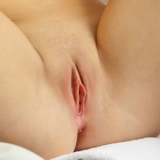

A close-up view of a woman's naked pussy and breasts is featured in the image. The woman's body is lying on a white towel, and her breasts and pussy can be seen clearly.
A close-up view of a woman's naked pussy and breasts is shown in the image. The woman appears to be lying on a white surface, possibly a bed or a towel, with her legs slightly spread apart.
A close-up shot of a woman's pussy and breasts is featured in the image. The woman's naked body is lying on a white towel, with her pussy and breasts prominently visible.
The image features a close-up view of a woman's naked body, specifically focusing on her vagina and breasts. The woman is lying down on a white towel or bed sheet, with her legs slightly spread apart. Her vagina is visible, and her breasts can be seen as well. The overall composition of the image highlights the woman's femininity and sensuality.
A close-up shot of a woman's naked pussy and breasts is displayed on the screen. The woman is lying down on a white towel

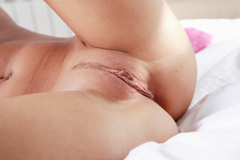

A naked woman is lying on a bed, exposing her pussy and breasts. She is positioned in such a way that her body is partially covered by the blanket, while her pussy and breasts are visible.
a naked woman is laying on her stomach, exposing her pussy and breasts
a woman is laying on her stomach, exposing her pussy and breasts
In the image, a woman is lying on a bed with her pussy and breasts exposed. She is positioned in such a way that her pussy is visible, and her breasts are also partially visible. The woman's body is stretched out on the bed, and she appears to be relaxed and enjoying herself. Her pussy and breasts are the focal point of the image, as they are prominently displayed for the viewer to see.
A naked woman is lying on a bed with her legs spread open, exposing her pussy and breasts. The woman's body is positioned in such a way that her pussy and breasts are the main focus of the image.
a woman is laying on her stomach with her pussy and breasts exposed
a woman is laying on 

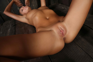

a naked woman laying on a wooden floor
a naked woman laying on a wooden floor, showing her pussy and breasts
a naked woman laying on a wooden surface
In the image, a naked woman is laying on a wooden floor, exposing her pussy and breasts. She is positioned in a provocative way, with her legs spread open and her hands resting on the floor beside her. The woman's pussy and breasts are the focal points of the image, capturing the viewer's attention.
a naked woman laying on a wooden floor
a naked woman laying on a wooden floor
a naked woman laying on a wooden floor
In the image, a naked woman is lying on a wooden floor, exposing her pussy and breasts. Her body is positioned in such a way that her legs are spread open, revealing her pussy and breasts to the viewer. The woman's pussy and breasts are the focal point of the image, as they are prominently displayed for the viewer to appreciate.


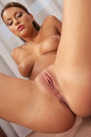

a naked woman laying on the floor with her pussy and breasts exposed
a naked woman laying on the floor with her legs open and showing her pussy
a naked woman laying on the floor with her pussy exposed
In the image, a young woman is lying on the floor with her pussy exposed. She is posing in a seductive manner, showcasing her shaved pussy and breasts. The close-up shot captures the intimate details of the woman's body, emphasizing her beauty and sensuality.
a naked woman with big tits is lying on the floor, showing her pussy
a naked woman with big breasts is laying on the floor
a naked woman is laying on the floor, showing off her pussy and breasts
In the image, a young woman is lying on the floor with her pussy and breasts exposed. She is posing seductively for the camera, showcasing her shaved pussy and ample breasts. The close-up shot captures every detail of her naked body, highlighting her natural beauty and sensuality.


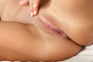

a close-up of a woman's pussy and breasts
a close-up shot of a woman's pussy and breasts
a close-up shot of a woman's naked pussy and breasts
The image features a close-up shot of a woman's pussy and breasts as she lays down on a bed. The woman's pussy is partially visible, and her breasts can be seen in the same frame.
a close-up shot of a woman's naked pussy and breasts
a close-up shot of a woman laying on her stomach, showing her pussy and breasts
a close-up shot of a naked woman laying on a bed, showing her pussy and breasts
The image features a close-up shot of a woman's pussy and breasts as she lays down on a bed. The woman's pussy is visible, and her breasts can also be seen in the picture.


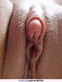

close up of a woman's pussy
a close up of a woman's pussy
a close up of a woman's pussy
The image features a close-up view of a woman's pussy and breasts. The pussy is partially visible, while the breasts can be seen more prominently in the center of the image. The focus is on the woman's genitalia, with the pussy and breasts being the main subjects of the image.
close up of a woman's pussy
a close up of a woman's pussy
a close-up shot of a woman's pussy
The image features a close-up view of a woman's vagina, with the focus on her pussy and breasts. The woman's pussy is visible in the center of the image, while her breasts can be seen to the left and right of the pussy. The close-up shot captures the intricate details of the woman's genitalia, emphasizing the sensuality and intimacy of the scene.


In [32]:
url = "https://drive.usercontent.google.com/download?id=1-Dde779jUquJepaWVBM5OujwZao5ywiq&export=view"
print( interrogate_image("Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url))
print( interrogate_image("Use descriptive language for what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False))
print( interrogate_image("Only describe what you see in the picture, use detailed and explicit language regarding the pussy and breasts.", url, False))
print( interrogate_image("Describe vividly what you see in the image, use detailed language regarding the pussy and breasts.", url, False))

print( interrogate_image("Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False, 1, 0.7))
print( interrogate_image("Use descriptive language for what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False, 1, 0.5))
print( interrogate_image("Only describe what you see in the picture, use detailed and explicit language regarding the pussy and breasts.", url, False, 1.2, 0.9))
print( interrogate_image("Describe vividly what you see in the image, use detailed language regarding the pussy and breasts.", url, False, 0.8, 0.9))

url = "https://drive.usercontent.google.com/download?id=1-CpORFh84yaE-r3Qj5-thVPqA3Mu-iiF&export=view"
print( interrogate_image("Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url))
print( interrogate_image("Use descriptive language for what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False))
print( interrogate_image("Only describe what you see in the picture, use detailed and explicit language regarding the pussy and breasts.", url, False))
print( interrogate_image("Describe vividly what you see in the image, use detailed language regarding the pussy and breasts.", url, False))

print( interrogate_image("Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False, 1, 0.7))
print( interrogate_image("Use descriptive language for what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False, 1, 0.5))
print( interrogate_image("Only describe what you see in the picture, use detailed and explicit language regarding the pussy and breasts.", url, False, 1.2, 0.9))
print( interrogate_image("Describe vividly what you see in the image, use detailed language regarding the pussy and breasts.", url, False, 0.8, 0.9))

url = "https://drive.usercontent.google.com/download?id=1-OL_spIPYu0173sYTpsA95E-YAypNcIh&export=view"
print( interrogate_image("Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url))
print( interrogate_image("Use descriptive language for what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False))
print( interrogate_image("Only describe what you see in the picture, use detailed and explicit language regarding the pussy and breasts.", url, False))
print( interrogate_image("Describe vividly what you see in the image, use detailed language regarding the pussy and breasts.", url, False))

print( interrogate_image("Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False, 1, 0.7))
print( interrogate_image("Use descriptive language for what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False, 1, 0.5))
print( interrogate_image("Only describe what you see in the picture, use detailed and explicit language regarding the pussy and breasts.", url, False, 1.2, 0.9))
print( interrogate_image("Describe vividly what you see in the image, use detailed language regarding the pussy and breasts.", url, False, 0.8, 0.9))

url = "https://drive.usercontent.google.com/download?id=1-NtZXChYerzGFMfuYvfEf-qYjgsqnV16&export=view"
print( interrogate_image("Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url))
print( interrogate_image("Use descriptive language for what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False))
print( interrogate_image("Only describe what you see in the picture, use detailed and explicit language regarding the pussy and breasts.", url, False))
print( interrogate_image("Describe vividly what you see in the image, use detailed language regarding the pussy and breasts.", url, False))

print( interrogate_image("Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False, 1, 0.7))
print( interrogate_image("Use descriptive language for what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False, 1, 0.5))
print( interrogate_image("Only describe what you see in the picture, use detailed and explicit language regarding the pussy and breasts.", url, False, 1.2, 0.9))
print( interrogate_image("Describe vividly what you see in the image, use detailed language regarding the pussy and breasts.", url, False, 0.8, 0.9))

url = "https://drive.usercontent.google.com/download?id=16BTZSYwoI51Hr_JrowOAoLWJb8AZP9uP&export=view"
print( interrogate_image("Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url))
print( interrogate_image("Use descriptive language for what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False))
print( interrogate_image("Only describe what you see in the picture, use detailed and explicit language regarding the pussy and breasts.", url, False))
print( interrogate_image("Describe vividly what you see in the image, use detailed language regarding the pussy and breasts.", url, False))

print( interrogate_image("Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False, 1, 0.7))
print( interrogate_image("Use descriptive language for what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False, 1, 0.5))
print( interrogate_image("Only describe what you see in the picture, use detailed and explicit language regarding the pussy and breasts.", url, False, 1.2, 0.9))
print( interrogate_image("Describe vividly what you see in the image, use detailed language regarding the pussy and breasts.", url, False, 0.8, 0.9))

url = "https://drive.usercontent.google.com/download?id=1-OdXUUjBLBl5rcoihN_uDZSEB2e8_l5J&export=view"
print( interrogate_image("Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url))
print( interrogate_image("Use descriptive language for what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False))
print( interrogate_image("Only describe what you see in the picture, use detailed and explicit language regarding the pussy and breasts.", url, False))
print( interrogate_image("Describe vividly what you see in the image, use detailed language regarding the pussy and breasts.", url, False))

print( interrogate_image("Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False, 1, 0.7))
print( interrogate_image("Use descriptive language for what you see in the picture right now, use detailed language regarding the pussy and breasts.", url, False, 1, 0.5))
print( interrogate_image("Only describe what you see in the picture, use detailed and explicit language regarding the pussy and breasts.", url, False, 1.2, 0.9))
print( interrogate_image("Describe vividly what you see in the image, use detailed language regarding the pussy and breasts.", url, False, 0.8, 0.9))


/usr/local/lib/python3.10/dist-packages/bitsandbytes/autograd/_functions.py:322: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


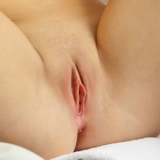

0: A close-up shot of a woman's pussy and breasts is displayed on a white towel. The woman's nipples are also visible in the image.
1: The image features a close-up view of a woman's naked body, specifically focusing on her pussy and breasts. The woman is lying down on a white towel or bed sheet, with her pussy and breasts prominently displayed. Her pussy is partially covered by the towel, while her breasts are fully exposed. The image captures a sensual and intimate moment, showcasing the beauty and femininity of the woman's body.
2: of the naked woman laying on a bed
3: No
4: No, only her vagina is visible.


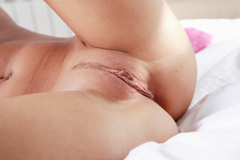

0: A naked woman is lying on a bed, exposing her pussy and breasts. Her body is positioned in such a way that her right breast is visible and her pussy is partially exposed. The woman appears to be relaxed and enjoying herself as she lounges on the bed.
1: In the image, a naked woman is laying on a bed, exposing her pussy and breasts. Her body is positioned in a way that allows for a clear view of her genitalia and breasts. The close-up shot captures the intimate details of the woman's body, showcasing her natural beauty and sensuality.
2: of the naked woman laying on the bed
3: No
4: No


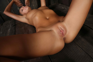

0: a naked woman laying on a wooden surface
1: In the image, a naked woman is lying down on a wooden surface, exposing her pussy and breasts. Her body is positioned in such a way that her legs are spread open and her pussy is visible. The woman's breasts are also prominently displayed, adding to the overall sensual and provocative nature of the scene.
2: of the naked woman laying on a wooden floor
3: No
4: No


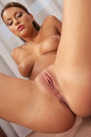

0: a woman is laying on the floor with her pussy and breasts exposed
1: In the image, a young woman is lying on the floor with her pussy and breasts exposed. She is showing off her shaved pussy and nicely shaped breasts, which are visible in the close-up shot. The woman's nipples are also highlighted in the image.
2: of a naked woman laying on the floor
3: Yes
4: No


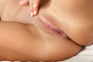

0: a woman is laying on her stomach with her pussy and breasts exposed
1: The image features a close-up shot of a woman's pussy and breasts. The woman is lying down on a bed, exposing her naked body, with her pussy and breasts prominently displayed.
2: of a woman laying on her stomach with her pussy exposed
3: No
4: Yes


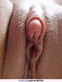

0: close up of a woman's pussy
1: The image features a close-up view of a woman's pussy and breasts. The pussy is visible in the center of the image, while the breasts can be seen on either side of the pussy. The close-up shot captures the intimate details of the woman's anatomy, emphasizing the natural beauty of her pussy and breasts.
2: and the position of the camera in relation to the subject. a close up shot of a woman's nipple
3: No
4: Yes


In [35]:
urls = [
    'https://drive.usercontent.google.com/download?id=1-Dde779jUquJepaWVBM5OujwZao5ywiq&export=view',
    'https://drive.usercontent.google.com/download?id=1-CpORFh84yaE-r3Qj5-thVPqA3Mu-iiF&export=view',
    'https://drive.usercontent.google.com/download?id=1-OL_spIPYu0173sYTpsA95E-YAypNcIh&export=view',
    'https://drive.usercontent.google.com/download?id=1-NtZXChYerzGFMfuYvfEf-qYjgsqnV16&export=view',
    'https://drive.usercontent.google.com/download?id=16BTZSYwoI51Hr_JrowOAoLWJb8AZP9uP&export=view',
    'https://drive.usercontent.google.com/download?id=1-OdXUUjBLBl5rcoihN_uDZSEB2e8_l5J&export=view'
]
prompts = [
    "Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.",
    "Describe vividly what you see in the image, use detailed language regarding the pussy and breasts.",
    "Describe the angle of the photo",
    "Can you see the womans head?",
    "Can you see the womans breasts?",
]

for ind1, url in enumerate(urls):
    for ind2, prompt in enumerate(prompts):
        if ind2 == 0:
            print( interrogate_image2(ind2, prompt, url, True))
        else:
            print( interrogate_image2(ind2, prompt, url, False))
        #print( ind2 )


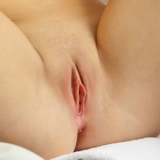

0: a low angle shot of a woman's vagina
1: Yes, there is a towel covering the woman's body.


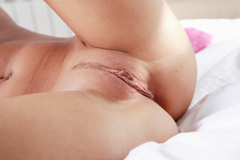

0: a low angle shot of a woman laying on a bed
1: No, there are no clothing in the picture.


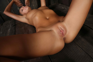

0: a naked woman laying on a wooden floor with her legs up in the air
1: No


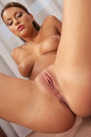

0: close up shot of a naked woman laying on the floor
1: Yes, there is clothing in the picture. The woman is wearing a necklace and a bra.


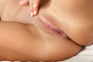

0: a low angle shot of a woman laying on her stomach
1: No, the woman in the picture is naked.


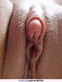

0: a close up shot of a woman's vagina
1: No


In [36]:
urls = [
    'https://drive.usercontent.google.com/download?id=1-Dde779jUquJepaWVBM5OujwZao5ywiq&export=view',
    'https://drive.usercontent.google.com/download?id=1-CpORFh84yaE-r3Qj5-thVPqA3Mu-iiF&export=view',
    'https://drive.usercontent.google.com/download?id=1-OL_spIPYu0173sYTpsA95E-YAypNcIh&export=view',
    'https://drive.usercontent.google.com/download?id=1-NtZXChYerzGFMfuYvfEf-qYjgsqnV16&export=view',
    'https://drive.usercontent.google.com/download?id=16BTZSYwoI51Hr_JrowOAoLWJb8AZP9uP&export=view',
    'https://drive.usercontent.google.com/download?id=1-OdXUUjBLBl5rcoihN_uDZSEB2e8_l5J&export=view'
]
prompts = [
    "Describe the camera angle as Eye-Level shot, Low Angle shot, High Angle shot, Bird's-Eye View, Dutch Angle Shot, Close-Up Shot, Long Angle Shot or Medium Shot.",
    "Are there any clothing in the picture?"
]

for ind1, url in enumerate(urls):
    for ind2, prompt in enumerate(prompts):
        if ind2 == 0:
            print( interrogate_image2(ind2, prompt, url, True))
        else:
            print( interrogate_image2(ind2, prompt, url, False))
        #print( ind2 )


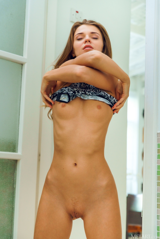

0: A young, naked woman is posing in front of a mirror with her hands behind her back, revealing her bare breasts and pussy.
1: a nude woman posing in front of a mirror
2: skinny
3: Yes, there is a piece of clothing in the picture - a bra.
4: No
5: No


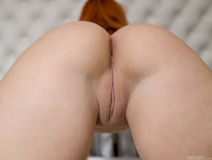

0: A naked woman is shown from behind, with a close-up view of her buttocks and an intimate shot of her pussy. The woman's hair appears to be red, and her breasts are visible in the image.
1: a close up shot of a woman's ass
2: big
3: No, the woman in the picture is naked.
4: No
5: No, only her ass is visible.


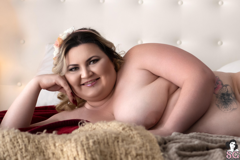

0: A large, plus-sized woman is lying down on a bed, posing for the camera. She has a tattoo on her right arm and a smile on her face. The woman's breasts are visible, and she appears to be comfortable and relaxed in this pose.
1: a woman laying on a bed with a flower in her hair
2: fat
3: Yes, there is a bra on the woman in the picture.
4: Yes
5: Yes, the woman is naked and her breasts are visible.


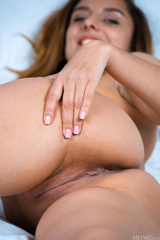

0: a woman is laying on her stomach, exposing her pussy and breasts
1: a woman is laying on her stomach with her ass in the air
2: small
3: No, the woman is naked in the picture.
4: No
5: No


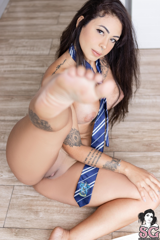

0: A young woman is posing naked on a wooden floor, wearing a blue tie around her neck. She has a tattoo on her right thigh and another one on her left ankle. The woman's bare breasts are also visible in the image.
1: a woman posing naked on the floor wearing a tie
2: small
3: Yes, there are clothing items in the picture. The woman is wearing a tie and a shirt.
4: Yes, the woman's head is visible in the photo.
5: Yes, the woman is topless and her breasts are visible.


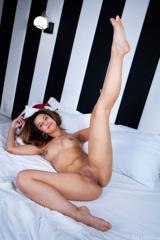

0: A naked woman is laying on a bed with her legs up in the air, exposing her bare pussy and breasts. She appears to be enjoying herself while relaxing on the bed.
1: a woman is laying on a bed with her legs up in the air
2: skinny
3: No, the woman is naked.
4: Yes
5: No


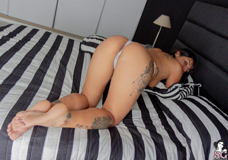

0: a naked woman is laying on a bed, exposing her pussy and breasts
1: a woman with tattoos laying on a black and white striped bed
2: small
3: Yes, there is a pair of white underwear on the woman's body.
4: No
5: No


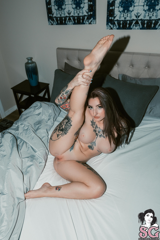

0: a woman is laying on a bed with her legs up in the air, exposing her pussy and breasts
1: a woman with tattoos laying on a bed in a low angle shot
2: skinny
3: Yes, there is clothing in the picture. The woman in the picture is wearing a bra and panties.
4: No
5: Yes, the woman in the picture is naked and her breasts are visible.


In [37]:
urls = [
    'https://drive.usercontent.google.com/download?id=1-duermrdDLflGK-PbN_t0wJaVgElW9OL&export=view',
    'https://drive.usercontent.google.com/download?id=1-e6P7uYmF-8qVl33h2u4THReg8vevAuE&export=view',
    'https://drive.usercontent.google.com/download?id=1-mf7kcV5X-3FsOuetVqeprw0YQdt_ba-&export=view',
    'https://drive.usercontent.google.com/download?id=1-oho_TustRRuJjKukU_l6IuArgrHdQMa&export=view',
    'https://drive.usercontent.google.com/download?id=1-rQstcncSf9ctjlCF7Z4QzBwkccfNZya&export=view',
    'https://drive.usercontent.google.com/download?id=1-tb38MoQfZvOdr5B4l8a9WXervdDu9ez&export=view',
    'https://drive.usercontent.google.com/download?id=1-v31hEz_GW3UVWMTJLJmymZD8cO6R-z_&export=view',
    'https://drive.usercontent.google.com/download?id=101f_r2TdeZvW8UYGfxsB1oPKALll5tNP&export=view'
]
prompts = [
    "Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.",
    "Describe the camera angle as Eye-Level shot, Low Angle shot, High Angle shot, Bird's-Eye View, Dutch Angle Shot, Close-Up Shot, Long Angle Shot or Medium Shot.",
    "Describe the woman as fat, big, normal, small or skinny.",
    "Are there any clothing in the picture?",
    "Can you see the womans head?",
    "Can you see the womans breasts?",
]

for ind1, url in enumerate(urls):
    for ind2, prompt in enumerate(prompts):
        if ind2 == 0:
            print( interrogate_image2(ind2, prompt, url, True))
        else:
            print( interrogate_image2(ind2, prompt, url, False))


/usr/local/lib/python3.10/dist-packages/bitsandbytes/autograd/_functions.py:322: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


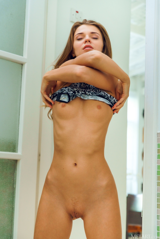

0: A naked woman is posing in front of a mirror, showing off her bare breasts and pussy. She is standing with her arms crossed over her chest, revealing her nudity to the viewer.
1: A naked woman is posing in front of a mirror, showcasing her toned body and bare breasts. She is holding her hands on her hips and standing in a provocative position, inviting the viewer to take a closer look at her physique. The image captures a moment of sensuality and femininity, emphasizing the woman's confidence and beauty.
2: A naked woman is standing in front of a mirror, posing with her hands on her hips. She appears to be proud of her body and is showcasing her bare breasts and pussy. The image captures the beauty and confidence of the woman as she presents herself in front of the mirror.
3: A naked woman is posing in front of a mirror, holding her breasts with her hands. She appears to be very proud of her body and is showcasing her toned stomach and thighs. The image captures the beauty and confi

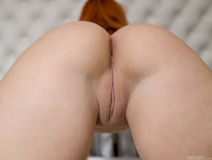

0: A close-up view of a woman's naked buttocks is shown in the image. The woman has red hair and appears to be posing for a photo. Her buttocks are exposed, revealing her pussy and breasts.
1: A close-up view of a woman's naked buttocks and pussy is displayed in the image. The woman's pussy appears to be well-groomed, with a nicely trimmed appearance. Additionally, the woman's breasts are also visible in the shot.
2: A close-up view of a woman's naked buttocks is shown in the image. The woman's buttocks appear to be well-shaped and nicely rounded.
3: A close-up view of a woman's buttocks and pussy is shown in the image. The woman's pussy appears to be well-groomed, and her buttocks are nicely shaped.
4: A close-up view of a woman's buttocks and pussy is shown in the image. The woman's pussy is visible, and her buttocks appear to be well-toned and nicely shaped. The focus is on the woman's pussy and buttocks, rather than her face or any other parts of her body.
5: The image features a c

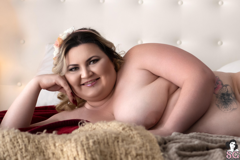

0: A plus-sized woman is lying on a bed, posing for a photo. She has a tattoo on her left arm and is wearing a flower in her hair. The woman's breasts are exposed and she appears to be smiling while laying on the bed.
1: A plus-sized woman is lying on a bed, posing and smiling for the camera. She has a visible tattoo on her upper right arm, which adds to her overall appearance. Additionally, there is a hand in the image, possibly belonging to the photographer or another person involved in the photo session.
2: A plus-sized woman is lying down on a bed, posing for a photo. She has a tattoo on her right arm and is wearing a flower in her hair. The woman's body is partially covered by a blanket, but her breasts and pussy are visible.
3: A plus-sized woman is lying on a bed, posing for a photo. She has a tattoo on her right arm and is wearing a flower in her hair. The woman's breasts are visible, and she appears to be smiling while laying on the bed.
4: A plus-sized woman is lying on a bed

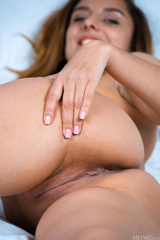

0: a woman is laying on a bed and showing her pussy
1: a woman is laying on a bed and showing off her pussy
2: a woman is laying on her stomach, showing off her pussy and breasts
3: a woman is laying on a bed and showing her pussy
4: a woman is laying on a bed and showing her pussy
5: a woman is laying on her stomach with her legs spread open, showing her pussy and breasts


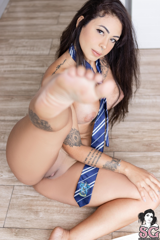

0: A young woman with tattoos is posing on the floor while wearing a blue tie. She has her legs spread apart, exposing her pussy and breasts to the viewer. The woman's pose is seductive and provocative, inviting the viewer to take a closer look at her body.
1: A young woman is posing on the floor, wearing a blue tie around her neck and showing off her tattoos. She is naked from the waist down, exposing her bare legs and toes. Her tattoos are visible on her arms and other parts of her body. Additionally, there is a close-up view of her pussy and breasts in the image.
2: A woman is posing naked on the floor, wearing a blue tie around her neck. She has tattoos on her arms and legs, which are visible in the image. The woman's bare breasts and pussy are also visible in the picture.
3: A woman with tattoos is posing on the floor, wearing a blue tie and showing off her nude body. She is sitting on the floor with her legs spread apart, exposing her pussy and breasts to the camera. The image ca

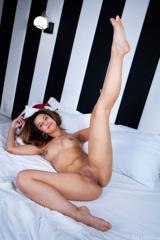

0: A naked woman is lying on a bed, posing for a photo. She has her legs up in the air, and her body is positioned in such a way that her breasts and pussy are visible.
1: A naked woman is laying on a bed, stretching her leg up in the air. She appears to be posing for a photo, as there is a camera nearby. The woman's bare breasts and pussy are visible in the image.
2: A naked woman is lying on a bed, posing and showing off her bare breasts and pussy. She is wearing a Santa hat, which adds to the festive and playful atmosphere of the scene.
3: A naked woman is lying on a bed, stretching her leg up in the air and exposing her pussy. Her breasts can also be seen in the image. She appears to be relaxed and enjoying herself as she lounges on the bed.
4: A naked woman is lying on a bed, posing for the camera. She has her legs up in the air, showing off her bare breasts and pussy. The woman's body is positioned in a seductive manner, inviting the viewer to take a closer look.
5: a naked woman

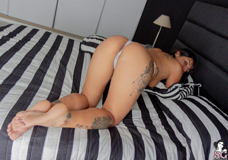

0: a naked woman laying on a black and white striped bed
1: a naked woman is laying on a black and white striped bed
2: a naked woman is laying on a bed with a black and white striped blanket
3: a naked woman is laying on a bed with a black and white striped blanket
4: a naked woman is laying on a bed with a black and white striped blanket
5: a naked woman laying on a black and white striped bed


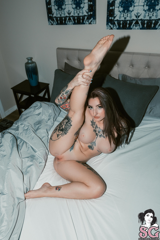

0: a naked woman with tattoos is laying on a bed and posing
1: a woman is laying on a bed with her legs up in the air, exposing her tattooed pussy and breasts
2: a woman with tattoos is laying on her stomach on a bed, exposing her pussy and breasts
3: a woman is laying on a bed with her legs up in the air, exposing her pussy and breasts
4: a woman with tattoos is laying on a bed, posing for a photo
5: a woman is laying on a bed with her legs bent up in the air, exposing her pussy and breasts


In [40]:
urls = [
    'https://drive.usercontent.google.com/download?id=1-duermrdDLflGK-PbN_t0wJaVgElW9OL&export=view',
    'https://drive.usercontent.google.com/download?id=1-e6P7uYmF-8qVl33h2u4THReg8vevAuE&export=view',
    'https://drive.usercontent.google.com/download?id=1-mf7kcV5X-3FsOuetVqeprw0YQdt_ba-&export=view',
    'https://drive.usercontent.google.com/download?id=1-oho_TustRRuJjKukU_l6IuArgrHdQMa&export=view',
    'https://drive.usercontent.google.com/download?id=1-rQstcncSf9ctjlCF7Z4QzBwkccfNZya&export=view',
    'https://drive.usercontent.google.com/download?id=1-tb38MoQfZvOdr5B4l8a9WXervdDu9ez&export=view',
    'https://drive.usercontent.google.com/download?id=1-v31hEz_GW3UVWMTJLJmymZD8cO6R-z_&export=view',
    'https://drive.usercontent.google.com/download?id=101f_r2TdeZvW8UYGfxsB1oPKALll5tNP&export=view'
]
prompts = [
    "Only describe what you see in the picture right now, use detailed language regarding the pussy and breasts.",
]

for ind1, url in enumerate(urls):
    for ind2, prompt in enumerate(prompts):
        if ind2 == 0:
            print( interrogate_image2(0, prompt, url, True, 1, 0.9))
            print( interrogate_image2(1, prompt, url, False, 1.2, 0.9))
            print( interrogate_image2(2, prompt, url, False, 0.8, 0.9))
            print( interrogate_image2(3, prompt, url, False, 0.6, 0.9))
            print( interrogate_image2(4, prompt, url, False, 1, 0.6))
            print( interrogate_image2(5, prompt, url, False, 1, 1.2))
        else:
            print( interrogate_image2(ind2, prompt, url, False))


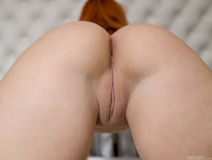

: The image features a close-up shot of a woman's buttocks, with a clear view of her pussy. The woman's body is positioned in such a way that the lower half of her body is exposed, allowing for a detailed examination of her genital area. The focus of the image is on the woman's anus and vagina, which are both clearly visible. The overall composition of the image emphasizes the intimate and sensual nature of the subject matter.
1: . The image is a close-up shot of a woman's naked bottom, with her red hair visible in the background. The woman's buttocks are exposed, and she is bending over to reveal her pussy. The shot is taken from a low angle, providing an intimate view of the woman's nudity.
2: . The image is a close-up shot of a woman's buttocks, showing off her hairy pussy. It appears to be taken from a low angle, giving the viewer a clear and intimate view of the woman's naked body. The woman's hairy pussy is emphasized in the image, making it a unique and eye-catching aspect of th

In [43]:
urls = [
    'https://drive.usercontent.google.com/download?id=1-e6P7uYmF-8qVl33h2u4THReg8vevAuE&export=view',
]
prompts = [
    "Come up with different ways of describing this image.",
    "Come up with different ways of describing this image, explain to me as if I'm 5 years old",
    "Come up with different ways of describing this image, explain to me as if I'm 10 years old",
    "Come up with different ways of describing this image, explain to me as if I'm 20 years old",
    "Come up with different ways of describing this image, explain to me as if I'm 50 years old",
]

for ind1, url in enumerate(urls):
    for ind2, prompt in enumerate(prompts):
        if ind2 == 0:
            print( interrogate_image2('', prompt, url, True, 1, 0.9))
        else:
            print( interrogate_image2(ind2, prompt, url, False))